In [1]:
import os
import pandas as pd
import numpy as np

path = r"C:\Users\devireddy ramreddy\Downloads\titanic"
file_name = "train.csv"
file_path = os.path.join(path, file_name)

try:
    df = pd.read_csv(file_path)
    print("✅ Loaded:", file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File not found. Check path: {file_path}")

✅ Loaded: C:\Users\devireddy ramreddy\Downloads\titanic\train.csv


In [2]:
# First rows
print(df.head())

# Shape
print("Shape:", df.shape)

# Info (types + non-null counts)
print(df.info())

# Missing values per column
print("Missing values:\n", df.isnull().sum())

# Basic numeric summary
print(df.describe(include='number').T)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Sh

In [3]:
df_raw = df.copy()
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

print("Missing after cleaning:\n", df.isnull().sum())

Missing after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [4]:
df['Sex_bin'] = df['Sex'].map({'male': 0, 'female': 1})

age_bins = [0, 12, 20, 40, 60, 120]
age_labels = ['child', 'teen', 'adult', 'middle_age', 'senior']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df['Embarked'] = df['Embarked'].astype('category')

if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    print(df[['Sex', 'Sex_bin', 'Age', 'Age_group', 'FamilySize', 'Embarked']].head())

      Sex  Sex_bin   Age Age_group  FamilySize Embarked
0    male        0  22.0     adult           2        S
1  female        1  38.0     adult           2        C
2  female        1  26.0     adult           1        S
3  female        1  35.0     adult           2        S
4    male        0  35.0     adult           1        S


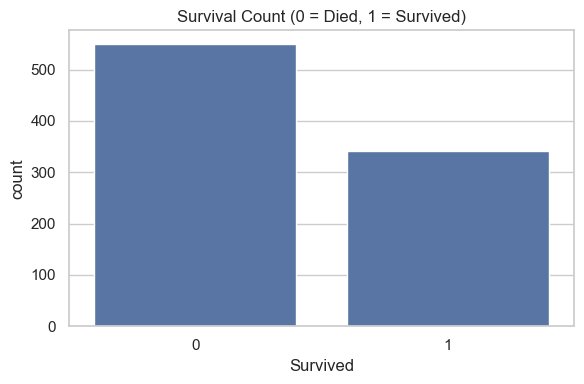

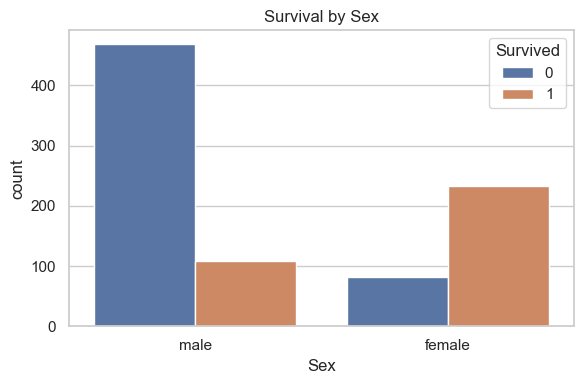

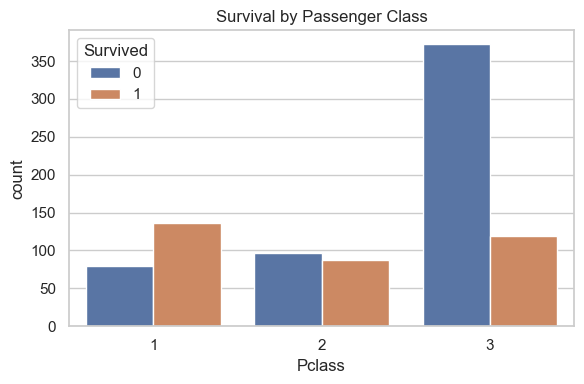

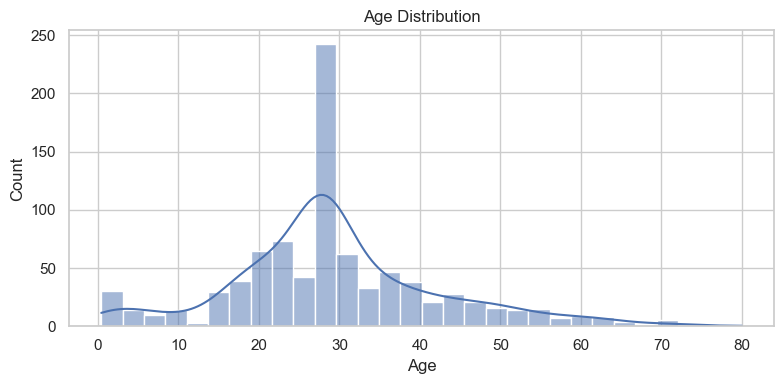

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # plotting style

# Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.tight_layout()
plt.show()

# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.tight_layout()
plt.show()

# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.tight_layout()
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

Survival rate by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival rate by age group:
 Age_group
child         0.573529
teen          0.416667
adult         0.358156
middle_age    0.394161
senior        0.269231
Name: Survived, dtype: float64


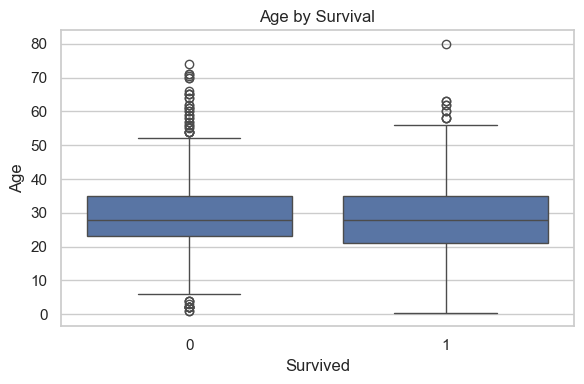

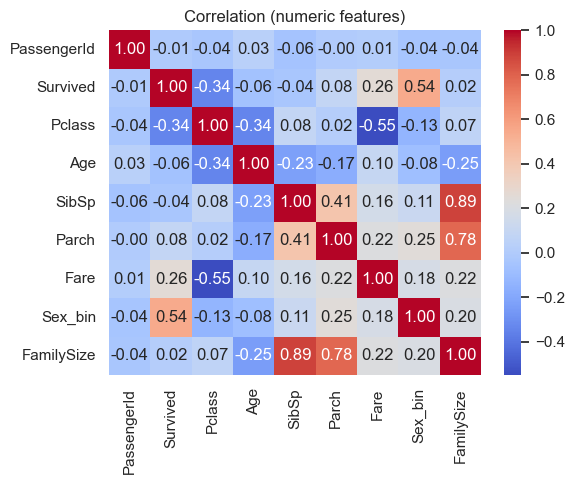

In [6]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Survival rate by sex:\n", survival_by_sex)

survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:\n", survival_by_pclass)

survival_by_agegroup = df.groupby('Age_group', observed=True)['Survived'].mean()
print("Survival rate by age group:\n", survival_by_agegroup)
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation (numeric features)')
plt.tight_layout()
plt.show()

In [7]:
pivot_sp = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
print("Survival rate by Sex and Pclass:\n", pivot_sp, "\n")

ct = pd.crosstab(index=[df['Sex'], df['Pclass']], columns=df['Survived'])
print("Crosstab Sex x Pclass x Survived:\n", ct)

Survival rate by Sex and Pclass:
 Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447 

Crosstab Sex x Pclass x Survived:
 Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47


In [8]:
print("Overall survival rate:", df['Survived'].mean())
print("Female survival rate:", df[df['Sex']=='female']['Survived'].mean())
print("Male survival rate:", df[df['Sex']=='male']['Survived'].mean())
print("Survival rate by Pclass:\n", df.groupby('Pclass')['Survived'].mean())


Overall survival rate: 0.3838383838383838
Female survival rate: 0.7420382165605095
Male survival rate: 0.18890814558058924
Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
